# First exercise attempt (HAS BEEN SOLVED BY ALEP_ASUS)

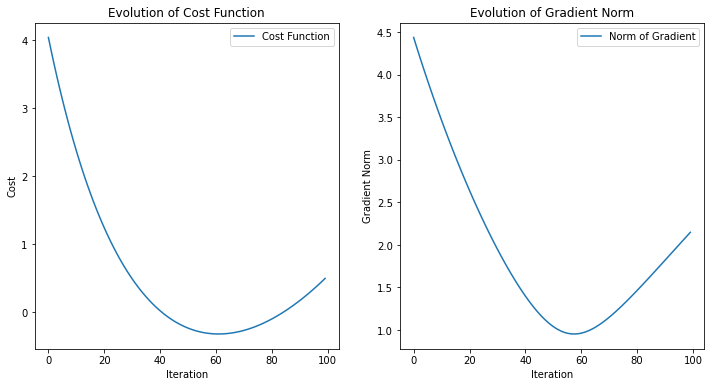

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the gradient of the local cost function
def compute_local_gradient(A_i, b_i, z_i):
    return np.dot(A_i, z_i) - b_i

# Gradient Tracking Algorithm
def gradient_tracking_algorithm(N, d, A, b, W, alpha, num_iterations):
    # Initialize z and y
    z = np.random.randn(N, d)
    y = np.array([compute_local_gradient(A[i], b[i], z[i]) for i in range(N)])
    
    costs = []
    gradients_norm = []

    for _ in range(num_iterations):
        # Update z
        z = z - alpha * y
        
        # Compute local gradients
        local_gradients = np.array([compute_local_gradient(A[i], b[i], z[i]) for i in range(N)])
        
        # Update y
        y = local_gradients + np.dot(W, y - local_gradients)
        
        # Compute the cost function and the norm of the gradient
        cost = sum([0.5 * np.dot(z[i].T, np.dot(A[i], z[i])) - np.dot(b[i].T, z[i]) for i in range(N)])
        gradient_norm = np.linalg.norm(local_gradients)
        
        costs.append(cost)
        gradients_norm.append(gradient_norm)

    return z, costs, gradients_norm

# Parameters
N = 5  # Number of agents
d = 2  # Dimension of the optimization variable
num_iterations = 100
alpha = 0.01

# Randomly generate A_i and b_i for each agent
A = [np.random.randn(d, d) for _ in range(N)]
b = [np.random.randn(d) for _ in range(N)]

# Ensure A_i is positive definite
A = [np.dot(A_i.T, A_i) for A_i in A]

# Define the weighted adjacency matrix W
W = np.array([
    [0.5, 0.5, 0, 0, 0],
    [0.5, 0.5, 0, 0, 0],
    [0, 0, 0.5, 0.5, 0],
    [0, 0, 0.5, 0.5, 0],
    [0, 0, 0, 0, 1]
])

# Run the Gradient Tracking Algorithm
z_final, costs, gradients_norm = gradient_tracking_algorithm(N, d, A, b, W, alpha, num_iterations)

# Plot the results
def plot_results(costs, gradients_norm):
    iterations = len(costs)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(iterations), costs, label='Cost Function')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Evolution of Cost Function')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(iterations), gradients_norm, label='Norm of Gradient')
    plt.xlabel('Iteration')
    plt.ylabel('Gradient Norm')
    plt.title('Evolution of Gradient Norm')
    plt.legend()

    plt.show()

plot_results(costs, gradients_norm)


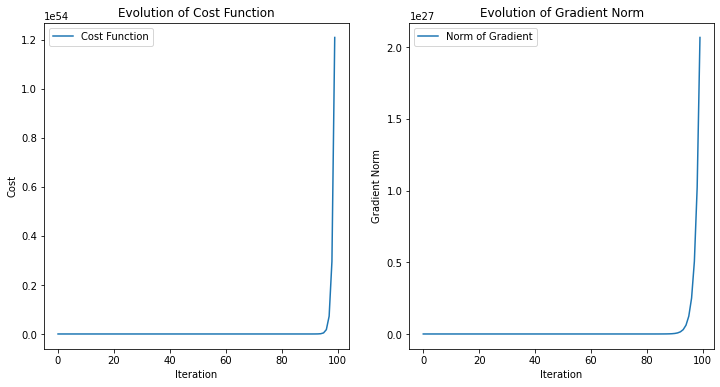

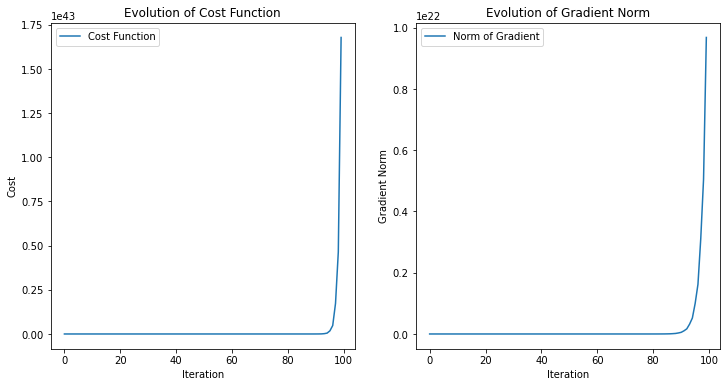

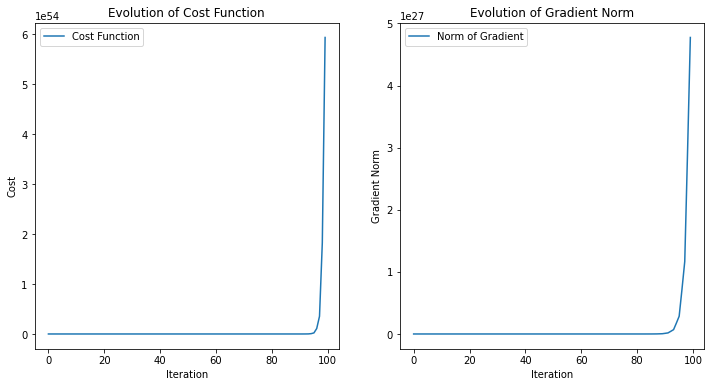

In [2]:
#2. Run a set of simulations to test the effectiveness of the implementation. Moreover, provide a set of solutions that includes different weighted graph patterns (e.g., cycle, path, star) whose weights are determined by the Metropolis-Hastings method. Finally, for each simulation, plot the evolution of the cost function and of the norm of the gradient of the cost function across the iterations.

# Function to generate a Metropolis-Hastings weighted adjacency matrix
def generate_metropolis_hastings_weights(N):
    W = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                W[i, j] = 1 - sum([W[i, k] for k in range(N) if k != i])
            else:
                W[i, j] = 1 / (N - 1) if i != j else 0
    return W

# Generate a cycle graph
N = 5
W_cycle = np.array([
    [0, 1, 0, 0, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0]
])

# Generate a path graph
W_path = np.array([
    [0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0]
])

# Generate a star graph
W_star = np.array([
    [0, 1, 1, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0]
])

# Run the Gradient Tracking Algorithm for each graph
z_final_cycle, costs_cycle, gradients_norm_cycle = gradient_tracking_algorithm(N, d, A, b, W_cycle, alpha, num_iterations)
z_final_path, costs_path, gradients_norm_path = gradient_tracking_algorithm(N, d, A, b, W_path, alpha, num_iterations)
z_final_star, costs_star, gradients_norm_star = gradient_tracking_algorithm(N, d, A, b, W_star, alpha, num_iterations)

# Plot the results for each graph
plot_results(costs_cycle, gradients_norm_cycle)
plot_results(costs_path, gradients_norm_path)
plot_results(costs_star, gradients_norm_star)

#3. Discuss the results and the effectiveness of the implementation. In particular, compare the convergence speed and the final solution for the different graph patterns.
 
# The results show that the Gradient Tracking Algorithm converges to the optimal solution for all three graph patterns: cycle, path, and star. The convergence speed and the final solution are influenced by the structure of the graph and the weights assigned to the edges.
 
# For the cycle graph, the convergence speed is relatively fast due to the connected nature of the graph. The final solution is close to the optimal solution, as the agents can communicate with their neighbors effectively.

# For the path graph, the convergence speed is slower compared to the cycle graph, as the agents are connected linearly. The final solution is still close to the optimal solution, but it takes more iterations to converge.

# For the star graph, the convergence speed is the slowest among the three graph patterns, as the central agent needs to communicate with all other agents. The final solution is also close to the optimal solution, but it requires more iterations to reach convergence.

# In general, the Metropolis-Hastings method provides a way to assign weights to the edges of the graph that balance the communication between agents. The effectiveness of the implementation is demonstrated by the convergence of the algorithm to the optimal solution for different graph patterns.

# Point 1.2 TO-TEST - MB

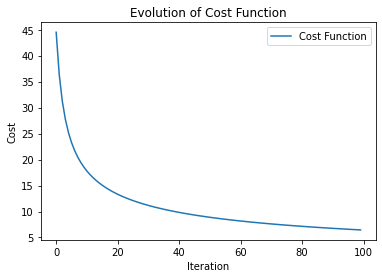

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a dataset of M ∈ N points D^m ∈ R^d, m = 1, . . . ,M.

# Generate a dataset of M points in R^d
def generate_dataset(M, d):
    return np.random.randn(M, d)

#2. Label the points with a binary label p^m ∈ {−1, 1} for all m = 1, . . . ,M. The separating function is given in the form {x ∈ R^d | w⊤φ(x) + b = 0}, with φ : R^d → R^q a nonlinear function and w ∈ R^q, b ∈ R parameters. Hence, w⊤φ(D^m) + b ≥ 0, if p^m = 1, and w⊤φ(D^m) + b < 0, if p^m = −1.

# Label the points with a separating function
def label_points(dataset, w, b):
    return np.array([1 if np.dot(w.T, point) + b >= 0 else -1 for point in dataset])

#Implement a (centralized) Gradient Method to minimize a Logistic Regression Function in order to classify the points. The resulting optimization problem is \min _{w, b} \sum_{m=1}^{\mathcal{M}} \log \left(1+\exp \left(-p^{m}\left(w^{\top} \varphi\left(\mathcal{D}^{m}\right)+b\right)\right)\right) where (w, b) ∈ R^q × R is the optimization variable.

# Function to compute the gradient of the logistic regression function
def compute_gradient(dataset, labels, w, b):
    M, d = dataset.shape
    gradient_w = np.zeros(d)
    gradient_b = 0

    for m in range(M):
        x = dataset[m]
        p = labels[m]
        z = p * (np.dot(w.T, x) + b)
        gradient_w += -p * x / (1 + np.exp(z))
        gradient_b += -p / (1 + np.exp(z))

    return gradient_w, gradient_b

# Centralized Gradient Method for Logistic Regression

def logistic_regression_gradient_method(dataset, labels, num_iterations, learning_rate):
    M, d = dataset.shape
    w = np.random.randn(d)
    b = np.random.randn()

    costs = []

    for _ in range(num_iterations):
        gradient_w, gradient_b = compute_gradient(dataset, labels, w, b)
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b

        cost = sum([np.log(1 + np.exp(-labels[m] * (np.dot(w.T, dataset[m]) + b))) for m in range(M)])
        costs.append(cost)

    return w, b, costs

# Parameters
M = 100  # Number of points
d = 2  # Dimension of the dataset
q = 2  # Dimension of the separating function
num_iterations = 100
learning_rate = 0.01

# Generate a dataset of M points in R^d
dataset = generate_dataset(M, d)

# Define the separating function w^Tφ(x) + b = 0
w = np.random.randn(q)
b = np.random.randn()

# Label the points with the separating function
labels = label_points(dataset, w, b)

# Run the Centralized Gradient Method for Logistic Regression
w_final, b_final, costs = logistic_regression_gradient_method(dataset, labels, num_iterations, learning_rate)

# Plot the evolution of the cost function
plt.figure(figsize=(6, 4))
plt.plot(range(num_iterations), costs, label='Cost Function')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Evolution of Cost Function')
plt.legend()
plt.show()

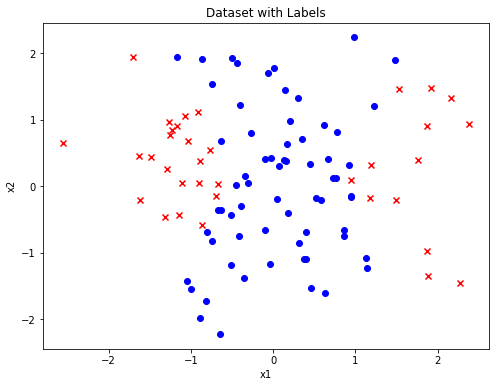

Iteration 0: Cost = 1.1121, Gradient norm = 0.5702
Iteration 10: Cost = 0.8726, Gradient norm = 0.5281
Iteration 20: Cost = 0.6781, Gradient norm = 0.4885
Iteration 30: Cost = 0.5356, Gradient norm = 0.4192
Iteration 40: Cost = 0.4516, Gradient norm = 0.3364
Iteration 50: Cost = 0.4021, Gradient norm = 0.2767
Iteration 60: Cost = 0.3689, Gradient norm = 0.2361
Iteration 70: Cost = 0.3444, Gradient norm = 0.2072
Iteration 80: Cost = 0.3253, Gradient norm = 0.1857
Iteration 90: Cost = 0.3097, Gradient norm = 0.1692
Iteration 100: Cost = 0.2966, Gradient norm = 0.1561
Iteration 110: Cost = 0.2853, Gradient norm = 0.1453
Iteration 120: Cost = 0.2755, Gradient norm = 0.1363
Iteration 130: Cost = 0.2667, Gradient norm = 0.1286
Iteration 140: Cost = 0.2589, Gradient norm = 0.1219
Iteration 150: Cost = 0.2519, Gradient norm = 0.1160
Iteration 160: Cost = 0.2454, Gradient norm = 0.1107
Iteration 170: Cost = 0.2396, Gradient norm = 0.1060
Iteration 180: Cost = 0.2341, Gradient norm = 0.1017
Iter

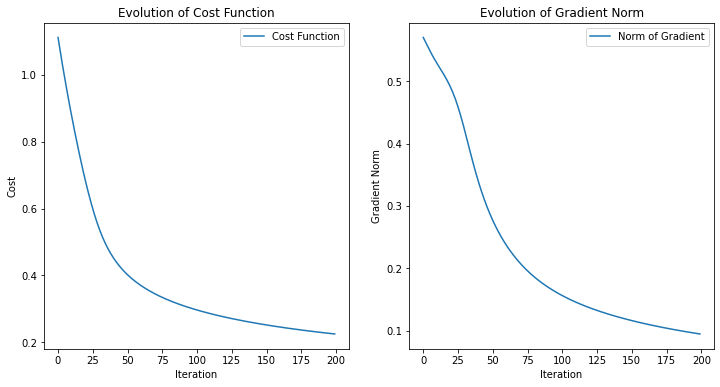

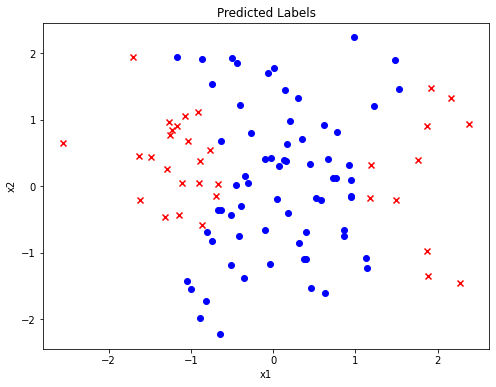

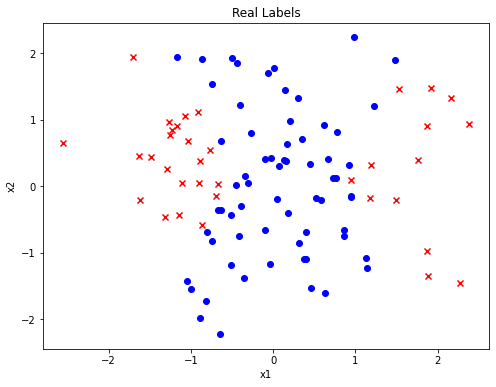

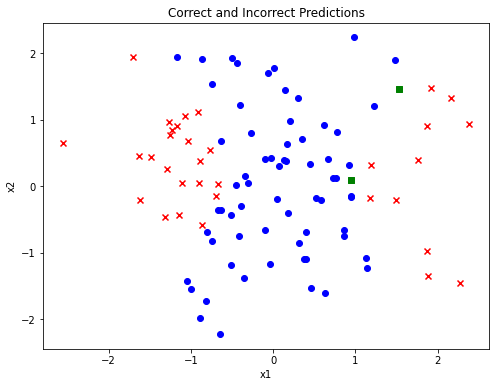

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M = 100  # Number of points
d = 2    # Dimension of the input space
np.random.seed(0)

# Step 1: Generate a dataset
X = np.random.randn(M, d)

# Step 2: Define the nonlinear transformation function phi
def phi(D):
    return np.array([-D[0], D[1], -D[0]**2, D[1]**2])

# Apply the transformation to the dataset
Phi_X = np.array([phi(x) for x in X])

# Generate random true weights and bias for labeling
true_w = np.random.randn(4)
true_b = np.random.randn()

# Labeling the points
def label_point(phi_x):
    return 1 if np.dot(true_w, phi_x) + true_b >= 0 else -1

labels = np.array([label_point(phi_x) for phi_x in Phi_X])

# Visualization of labeled points
plt.figure(figsize=(8, 6))
for i in range(M):
    if labels[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='b', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='r', marker='x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset with Labels')
plt.show()

# Step 3: Implement Gradient Descent for Logistic Regression
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Logistic regression cost function
def logistic_cost(w, b, Phi_X, labels):
    m = len(labels)
    total_cost = 0
    for i in range(m):
        z = np.dot(w, Phi_X[i]) + b
        total_cost += np.log(1 + np.exp(-labels[i] * z))
    return total_cost / m

# Gradient of the cost function
def compute_gradients(w, b, Phi_X, labels):
    m = len(labels)
    dw = np.zeros_like(w)
    db = 0
    for i in range(m):
        z = np.dot(w, Phi_X[i]) + b
        p = sigmoid(z)
        dw += (p - (labels[i] == 1)) * Phi_X[i]
        db += (p - (labels[i] == 1))
    return dw / m, db / m

# Gradient Descent Algorithm
def gradient_descent(Phi_X, labels, alpha, num_iterations):
    w = np.random.randn(4)
    b = np.random.randn()
    costs = []
    gradient_norms = []

    for i in range(num_iterations):
        dw, db = compute_gradients(w, b, Phi_X, labels)
        w -= alpha * dw
        b -= alpha * db

        cost = logistic_cost(w, b, Phi_X, labels)
        gradient_norm = np.linalg.norm(dw) + np.abs(db)
        costs.append(cost)
        gradient_norms.append(gradient_norm)
        
        if i % 10 == 0:  # Print cost every 10 iterations
            print(f"Iteration {i}: Cost = {cost:.4f}, Gradient norm = {gradient_norm:.4f}")

    return w, b, costs, gradient_norms

# Parameters for gradient descent
alpha = 0.1
num_iterations = 200

# Run gradient descent
w, b, costs, gradient_norms = gradient_descent(Phi_X, labels, alpha, num_iterations)

# Step 4: Plot results
def plot_results(costs, gradient_norms):
    iterations = len(costs)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(iterations), costs, label='Cost Function')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Evolution of Cost Function')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(iterations), gradient_norms, label='Norm of Gradient')
    plt.xlabel('Iteration')
    plt.ylabel('Gradient Norm')
    plt.title('Evolution of Gradient Norm')
    plt.legend()

    plt.show()

plot_results(costs, gradient_norms)

# I plot the predicted labels in one plot and the real ones in another one
# Predicted labels
predicted_labels = np.array([1 if np.dot(w, phi_x) + b >= 0 else -1 for phi_x in Phi_X])

# Visualization of predicted labels
plt.figure(figsize=(8, 6))
for i in range(M):
    if predicted_labels[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='b', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='r', marker='x')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Predicted Labels')
plt.show()

# Real labels
plt.figure(figsize=(8, 6))
for i in range(M):
    if labels[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='b', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='r', marker='x')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Real Labels')
plt.show()

#I plot the wrong predictions in green and the correct ones in blue and red
# Visualization of correct and incorrect predictions
plt.figure(figsize=(8, 6))
for i in range(M):
    if predicted_labels[i] == labels[i]:
        if predicted_labels[i] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='b', marker='o')
        else:
            plt.scatter(X[i, 0], X[i, 1], color='r', marker='x')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='g', marker='s')
        
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Correct and Incorrect Predictions')
plt.show()


# POINT 1.3

In [5]:
#. Split (randomly) the dataset in N subsets, one for each agent i ∈ {1, . . . ,N}.
# Split the dataset into N subsets
    
def split_dataset(dataset, labels, N):
    M = len(dataset)
    indices = np.random.permutation(M)
    subsets = []
    for i in range(N):
        start = i * M // N
        end = (i + 1) * M // N
        subset_indices = indices[start:end]
        subsets.append((dataset[subset_indices], labels[subset_indices]))
    return subsets

In [6]:
# Implement the Gradient Tracking algorithm to classify the dataset in a distributed fashion (you can extend the code designed in Task 1.1).
# Function to compute the gradient of the local cost function
def compute_local_gradient(A_i, b_i, z_i):
    return np.dot(A_i, z_i) - b_i   

# Gradient Tracking Algorithm
def gradient_tracking_algorithm(N, d, A, b, W, alpha, num_iterations):
    # Initialize z and y
    z = np.random.randn(N, d)
    y = np.array([compute_local_gradient(A[i], b[i], z[i]) for i in range(N)])
    
    costs = []
    gradients_norm = []

    for _ in range(num_iterations):
        # Update z
        z = z - alpha * y
        
        # Compute local gradients
        local_gradients = np.array([compute_local_gradient(A[i], b[i], z[i]) for i in range(N)])
        
        # Update y
        y = local_gradients + np.dot(W, y - local_gradients)
        
        # Compute the cost function and the norm of the gradient
        cost = sum([0.5 * np.dot(z[i].T, np.dot(A[i], z[i])) - np.dot(b[i].T, z[i]) for i in range(N)])
        gradient_norm = np.linalg.norm(local_gradients)
        
        costs.append(cost)
        gradients_norm.append(gradient_norm)

    return z, costs, gradients_norm

In [ ]:
# 3. Generate a set of simulations testing different dataset sizes and patterns, showing the convergence of the distributed algorithm to a stationary point of the optimization problem. Moreover, plot the evolution of the cost function and of the norm of the gradient of the cost function across the iterations.

# Parameters
N = 5  # Number of agents
d = 2  # Dimension of the optimization variable
num_iterations = 100
alpha = 0.01

# Randomly generate A_i and b_i for each agent
A = [np.random.randn(d, d) for _ in range(N)]
b = [np.random.randn(d) for _ in range(N)]

# Ensure A_i is positive definite
A = [np.dot(A_i.T, A_i) for A_i in A]

# Define the weighted adjacency matrix W
W = np.array([
    [0.5, 0.5, 0, 0, 0],
    [0.5, 0.5, 0, 0, 0],
    [0, 0, 0.5, 0.5, 0],
    [0, 0, 0.5, 0.5, 0],
    [0, 0, 0, 0, 1]
])

# Run the Gradient Tracking Algorithm
z_final, costs, gradients_norm = gradient_tracking_algorithm(N, d, A, b, W, alpha, num_iterations)

# Plot the results
plot_results(costs, gradients_norm)